Import libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

Load dataset and prepare df. Keeping only those columns, that are not directly computed out of new deaths, and have the highest correlation

In [18]:
file_path = "./data/nasdaq.csv"
date_column = "Date"
target_column = "Close/Last"
df = pd.read_csv(file_path, parse_dates=[date_column])

In [19]:
print(f"First date in dataset {df[date_column].min()}")
print(f"Last date in dataset {df[date_column].max()}")
print(f"Number of rows {len(df)}")


First date in dataset 2014-02-03 00:00:00
Last date in dataset 2024-01-31 00:00:00
Number of rows 2532


In [20]:

date = df[date_column]
df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
df.sort_index(inplace=True)
# df = df.select_dtypes(exclude=['object'])
correlation_with_target = (
    df.select_dtypes(exclude=["object"])
    .drop(columns=[target_column])
    .corrwith(df[target_column])
)
most_corr = correlation_with_target.sort_values(ascending=False).index.tolist()
most_corr = list(set(most_corr[:10] + most_corr[-10:]))
df = df[most_corr].merge(df[target_column], left_index=True, right_index=True)
most_corr

['Open', 'Low', 'High']

Plot the dataset

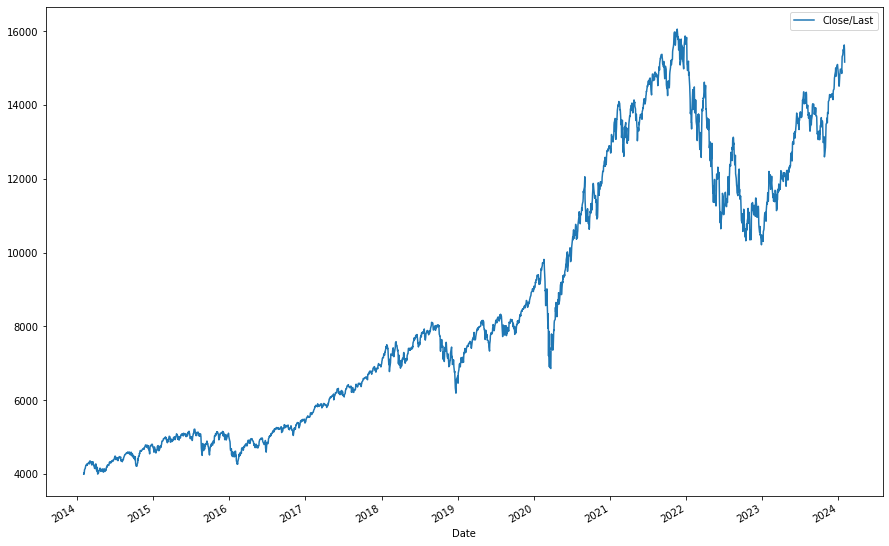

In [21]:
plot_cols = [target_column]
plot_features = df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(15, 10))

Display first values

In [35]:
df.head(20)

,Open,Low,High,Close/Last
Date,,,,
2014-02-03,4105.06,3989.95,4113.55,3996.96
2014-02-04,4019.44,4004.58,4044.20,4031.52
2014-02-05,4015.50,3968.19,4026.28,4011.55
2014-02-06,4022.66,4022.17,4064.06,4057.12
2014-02-07,4081.82,4069.93,4126.51,4125.86
2014-02-10,4125.12,4122.61,4148.30,4148.17
2014-02-11,4154.66,4153.10,4198.51,4191.04
2014-02-12,4196.85,4190.39,4212.61,4201.29
2014-02-13,4171.58,4170.47,4240.67,4240.67


In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2532.0,8600.913685,3636.281959,0.00,5143.8550,7696.895,11888.2525,16120.92
Low,2532.0,8537.145509,3602.586914,0.00,5116.3475,7650.625,11752.5550,16017.23
High,2532.0,8658.771979,3665.491623,0.00,5161.6375,7748.560,11949.5425,16212.23
Close/Last,2532.0,8631.772721,3584.263372,3996.96,5139.9075,7710.120,11856.9000,16057.44


In [24]:
df.index

DatetimeIndex(['2014-02-03', '2014-02-04', '2014-02-05', '2014-02-06',
               '2014-02-07', '2014-02-10', '2014-02-11', '2014-02-12',
               '2014-02-13', '2014-02-14',
               ...
               '2024-01-18', '2024-01-19', '2024-01-22', '2024-01-23',
               '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-29',
               '2024-01-30', '2024-01-31'],
              dtype='datetime64[ns]', name='Date', length=2532, freq=None)

Decompose the time series into trend, seasonal, and residual components and plot them

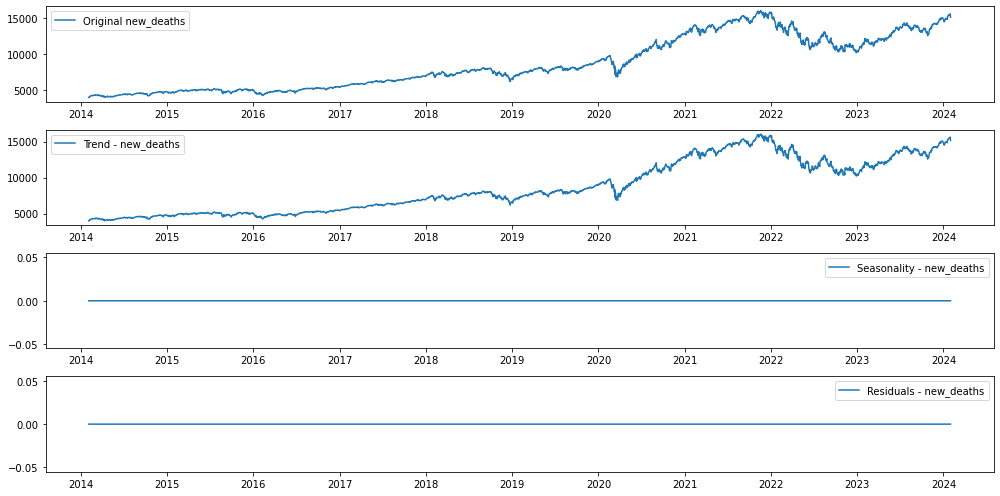

count     2532.000000
mean      8631.772721
std       3584.263372
min       3996.960000
25%       5139.907500
50%       7710.120000
75%      11856.900000
max      16057.440000
Name: Close/Last, dtype: float64


In [31]:
decomposition = seasonal_decompose(df[target_column], model="aditive", period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(14, 7))

plt.subplot(411)
plt.plot(df[target_column], label=f"Original new_deaths")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend, label=f"Trend - new_deaths")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal, label=f"Seasonality - new_deaths")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual, label=f"Residuals - new_deaths")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

# Display summary statistics for the current target_column
print(df[target_column].describe())

Due to zero values we don't make multiplicative

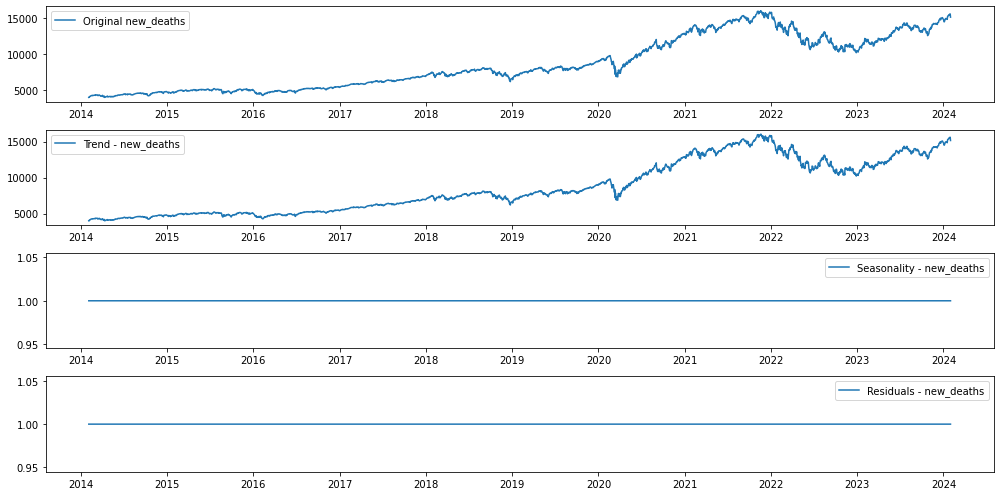

count     2532.000000
mean      8631.772721
std       3584.263372
min       3996.960000
25%       5139.907500
50%       7710.120000
75%      11856.900000
max      16057.440000
Name: Close/Last, dtype: float64


In [32]:
decomposition = seasonal_decompose(df[target_column], model="multiplicative", period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(14, 7))

plt.subplot(411)
plt.plot(df[target_column], label=f"Original new_deaths")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend, label=f"Trend - new_deaths")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal, label=f"Seasonality - new_deaths")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual, label=f"Residuals - new_deaths")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

# Display summary statistics for the current target_column
print(df[target_column].describe())

Plot ACF and PACF

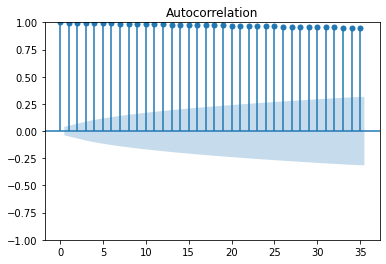

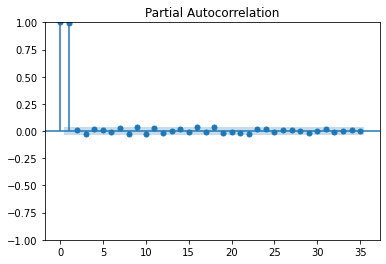

In [33]:
plot_acf(df[[target_column]])
plt.show()

plot_pacf(df[[target_column]])
plt.show()

Determine whether the dataset is stationary

In [34]:
def adf_test(dataset):
    dftest = adfuller(dataset, autolag="AIC")
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)


adf_test(df[target_column])

1. ADF :  -0.16424151792843478
2. P-Value :  0.942651870423072
3. Num Of Lags :  23
4. Num Of Observations Used For ADF Regression: 2508
5. Critical Values :
	 1% :  -3.432960050084045
	 5% :  -2.8626931078801285
	 10% :  -2.567383843706519


In [29]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, tsmode=True)
profile.to_file("profile_report.html")

C:\Users\ambro\AppData\Roaming\Python\Python39\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]c:\Users\ambro\AppData\Local\Programs\Python\P

,Close/Last,Open,High,Low
2014-02-03,3996.96,4105.06,4113.55,3989.95
2014-02-04,4031.52,4019.44,4044.20,4004.58
2014-02-05,4011.55,4015.50,4026.28,3968.19
2014-02-06,4057.12,4022.66,4064.06,4022.17
2014-02-07,4125.86,4081.82,4126.51,4069.93
2014-02-08,4125.86,4081.82,4126.51,4069.93
2014-02-09,4125.86,4081.82,4126.51,4069.93
2014-02-10,4148.17,4125.12,4148.30,4122.61
2014-02-11,4191.04,4154.66,4198.51,4153.10
2014-02-12,4201.29,4196.85,4212.61,4190.39


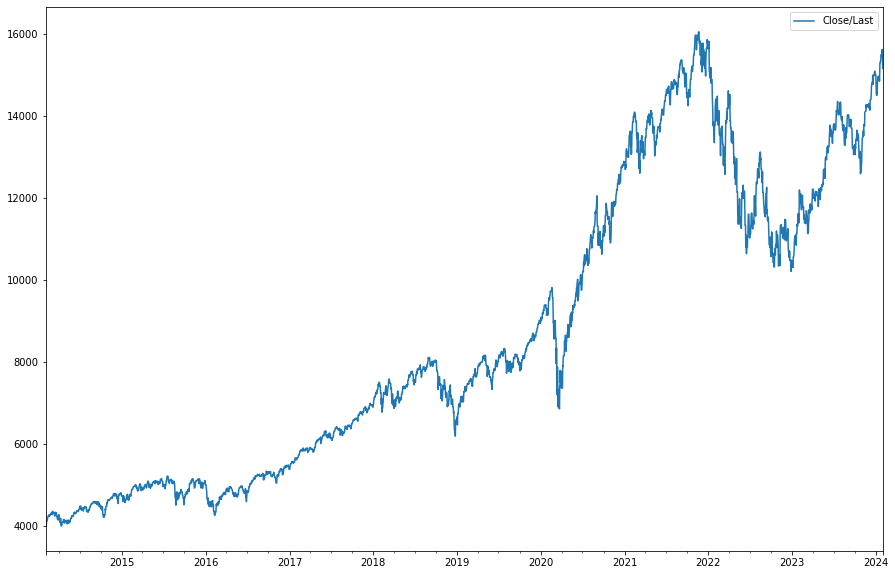

In [44]:
import pandas as pd

# Example: Load your data
# Replace 'your_stock_data.csv' with your actual file path
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

start_date = df.index.min()
end_date = df.index.max()
all_days = pd.date_range(start=start_date, end=end_date, freq='D')

# Reindex the DataFrame
df = df.reindex(all_days)

# Apply a fill method, e.g., forward fill
df_ffill = df.ffill()
# df.to_csv('./data/parsed_dataset.csv')

# date = df_ffill[date_column]
plot_cols = [target_column]
plot_features = df_ffill[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(15, 10))
df_ffill.head(20)